In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
train = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_14-41-37_train.csv' , header=0)
#train = train.drop(index=train.index[25:])
# identify the unique values in the 'ground_truth' column
unique_ids = train['ground_truth'].value_counts()[train['ground_truth'].value_counts() == 1].index

# filter out the rows with unique 'ground_truth' values
train = train[~train['ground_truth'].isin(unique_ids)]
train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.000036,-0.005839,0.000036,-0.000036,-0.005839,0.000036,-0.000036,-0.000036,-0.000036,-0.000036,...,0.020859,-0.021720,-0.002635,-0.021803,-0.023519,0.019338,0.002390,-0.025528,-0.003180,http://www.semanticweb.org/needed-terms#001
1,-0.002563,0.004352,-0.000925,-0.002781,-0.003307,-0.006591,0.007723,0.000900,0.002940,-0.001755,...,-0.026561,-0.026467,0.011546,0.007113,0.029829,0.014343,-0.002327,0.024326,-0.010424,http://semanticscience.org/resource/SIO_001279
2,0.000291,0.000291,-0.003586,0.000291,0.003586,-0.003586,0.000291,-0.000291,0.003586,0.000291,...,0.002584,-0.002584,-0.002843,-0.002584,-0.002584,0.002584,0.002843,-0.002584,-0.002843,no_link_known
3,-0.001707,0.000702,-0.001692,-0.002502,0.000112,-0.004317,-0.000159,-0.000713,0.004310,0.002457,...,0.024196,-0.025993,-0.007683,-0.023339,-0.023716,0.022958,0.009925,-0.030913,-0.006875,http://www.semanticweb.org/needed-terms#001
4,0.002947,-0.002712,-0.003596,0.001877,0.003449,0.003197,-0.002988,0.004427,0.003860,0.002470,...,-0.037756,-0.021971,0.015067,-0.036230,0.034744,0.031243,0.053082,0.042770,0.049509,http://semanticscience.org/resource/SIO_001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364931,-0.001504,-0.001504,-0.001504,0.001504,-0.001504,-0.001504,0.001504,0.001504,0.001504,0.001504,...,0.016140,-0.025934,-0.008050,-0.023769,-0.021450,0.023729,0.008236,-0.023763,-0.008058,http://www.semanticweb.org/needed-terms#001
2364932,0.006778,0.001943,0.001943,0.010295,0.006778,-0.005460,-0.006778,-0.001943,0.010295,0.010295,...,-0.010916,0.015125,-0.016395,0.014115,0.011327,-0.010299,0.015740,0.014983,-0.004980,no_link_known
2364933,-0.003663,-0.007995,-0.002343,0.002343,-0.003663,0.001989,-0.001989,0.007995,0.002343,0.002343,...,-0.053474,0.018565,0.041466,-0.058139,0.033773,0.038972,0.043669,-0.018444,0.033126,no_link_known
2364934,-0.010859,-0.007195,-0.002744,-0.005639,-0.009460,0.000825,-0.002338,0.005121,0.000990,-0.002317,...,0.013257,-0.010965,-0.013171,-0.013267,-0.013147,0.013259,0.013239,-0.013260,-0.011003,http://www.semanticweb.org/needed-terms#001


In [3]:
s = setup(train, target = 'ground_truth', fold_strategy = 'stratifiedkfold', fold=2, n_jobs=5, train_size = 0.8, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,8513
1,Target,ground_truth
2,Target type,Multiclass
3,Target mapping,"http://semanticscience.org/resource/SIO_000281: 0, http://semanticscience.org/resource/SIO_000628: 1, http://semanticscience.org/resource/SIO_001279: 2, http://www.semanticweb.org/needed-terms#001: 3, http://www.semanticweb.org/needed-terms#002: 4, http://www.semanticweb.org/needed-terms#004: 5, http://www.semanticweb.org/needed-terms#009: 6, http://www.w3.org/1999/02/22-rdf-syntax-ns#label: 7, http://www.w3.org/1999/02/22-rdf-syntax-ns#type: 8, http://www.w3.org/2000/01/rdf-schema#subClassOf: 9, no_link_known: 10"
4,Original data shape,"(2364936, 101)"
5,Transformed data shape,"(2364936, 101)"
6,Transformed train set shape,"(1891948, 101)"
7,Transformed test set shape,"(472988, 101)"
8,Numeric features,100
9,Preprocess,True


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [4]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9522,0.9920,0.9522,0.9539,0.9523,0.9309,0.9316,191.2950
rf,Random Forest Classifier,0.9518,0.9909,0.9518,0.9535,0.9518,0.9303,0.9311,585.1050
et,Extra Trees Classifier,0.9505,0.9907,0.9505,0.9522,0.9505,0.9284,0.9292,203.0850
gbc,Gradient Boosting Classifier,0.9492,0.9913,0.9492,0.9509,0.9493,0.9266,0.9273,45861.8350
knn,K Neighbors Classifier,0.9484,0.9825,0.9484,0.9498,0.9482,0.9254,0.9261,1461.5750
lr,Logistic Regression,0.9373,0.9877,0.9373,0.9378,0.9372,0.9089,0.9092,651.8100
lda,Linear Discriminant Analysis,0.9265,0.9841,0.9265,0.9351,0.9282,0.8952,0.8970,86.2500
nb,Naive Bayes,0.9226,0.9837,0.9226,0.9317,0.9242,0.8898,0.8918,82.9700
ridge,Ridge Classifier,0.9197,0.0000,0.9197,0.9198,0.9137,0.8826,0.8830,36.3800
dt,Decision Tree Classifier,0.9169,0.9385,0.9169,0.9169,0.9169,0.8782,0.8783,478.1350


TypeError: Drawing.draw() got an unexpected keyword argument 'ax'

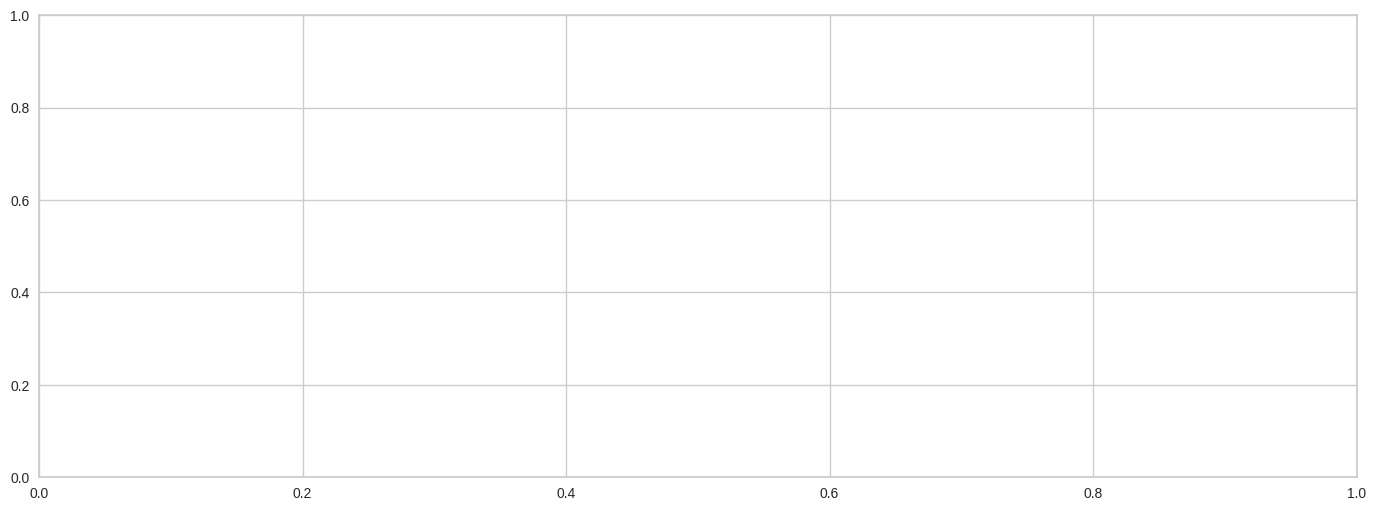

In [6]:
plot_model(best, plot = 'pipeline')

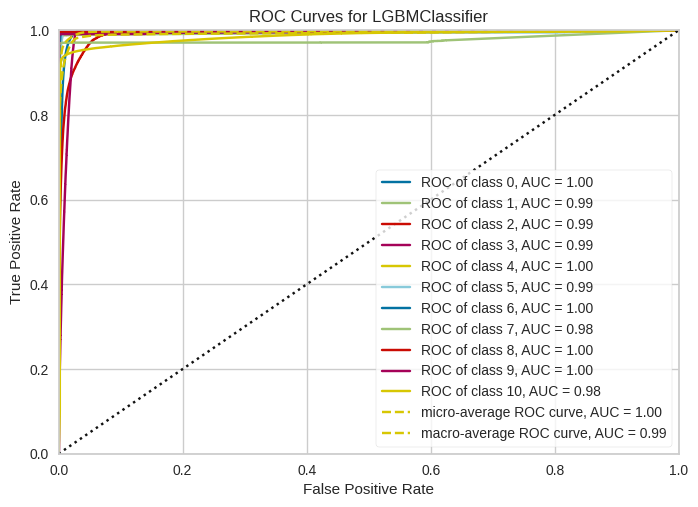

In [7]:
plot_model(best, plot = 'auc')

In [8]:
plot_model(best, plot = 'threshold')

ValueError: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.

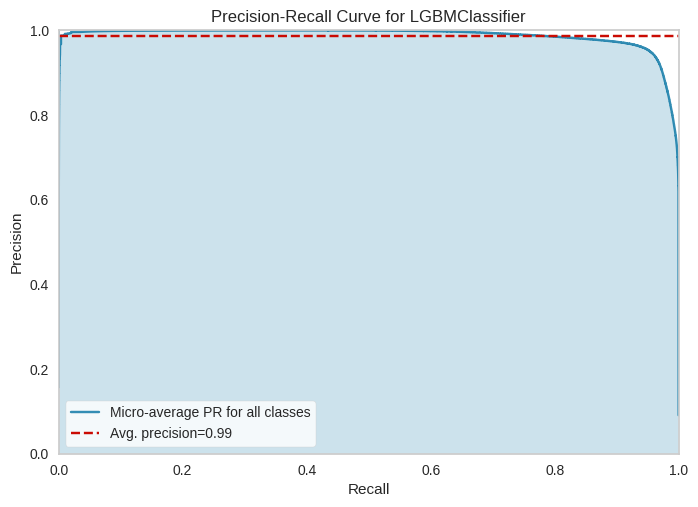

In [9]:
plot_model(best, plot = 'pr')

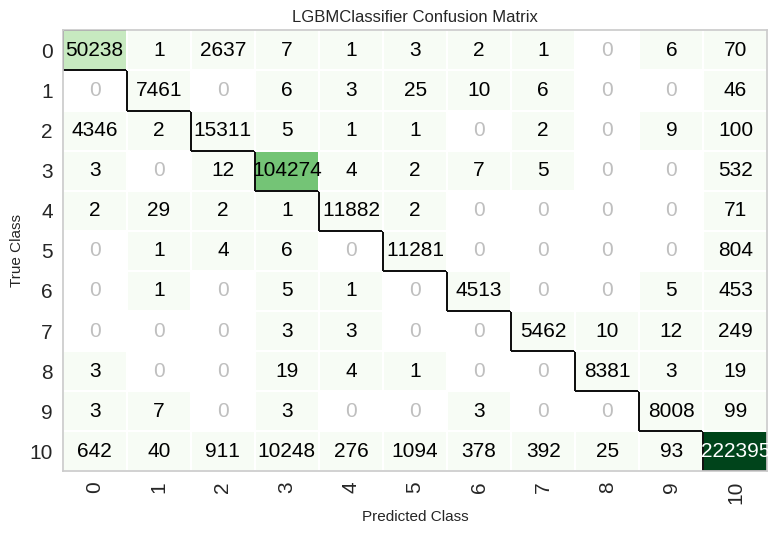

In [10]:
plot_model(best, plot = 'confusion_matrix')

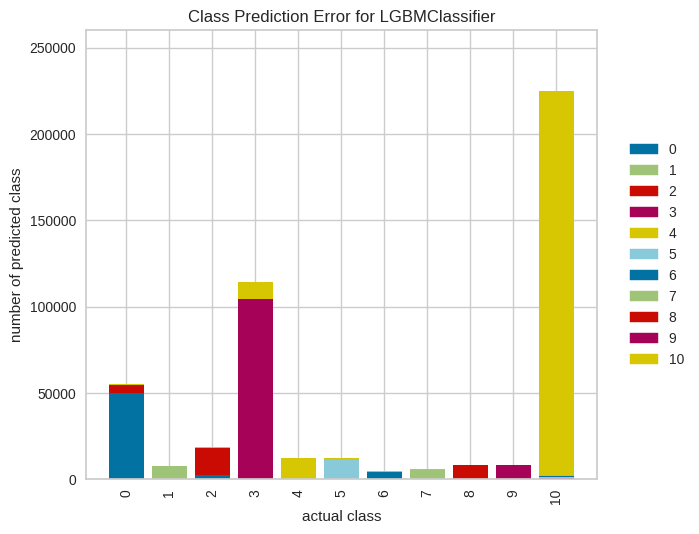

In [11]:
plot_model(best, plot = 'error')

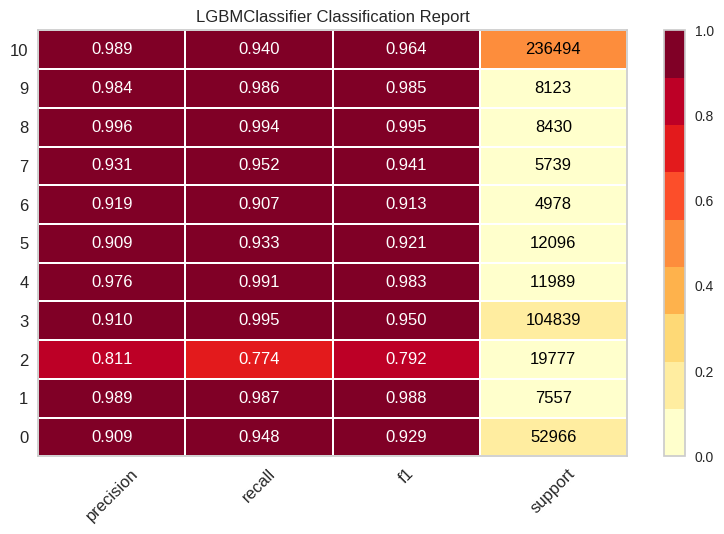

In [12]:
plot_model(best, plot = 'class_report')

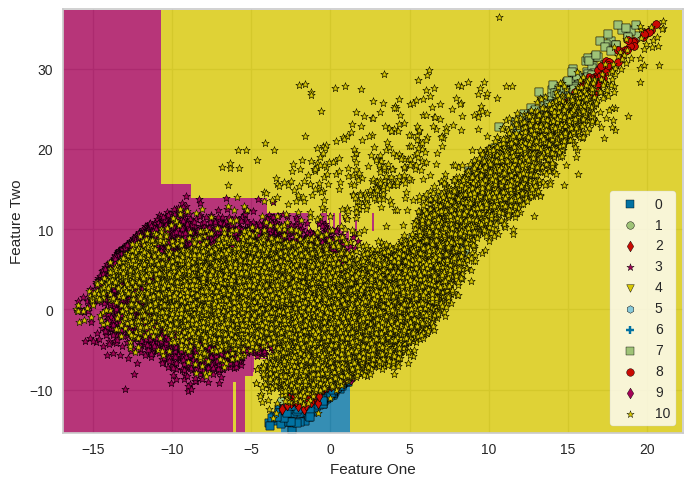

In [14]:
plot_model(best, plot = 'boundary')

In [15]:
plot_model(best, plot = 'rfe')

ValueError: Plot Not Available for multiclass problems. Please see docstring for list of available Plots.

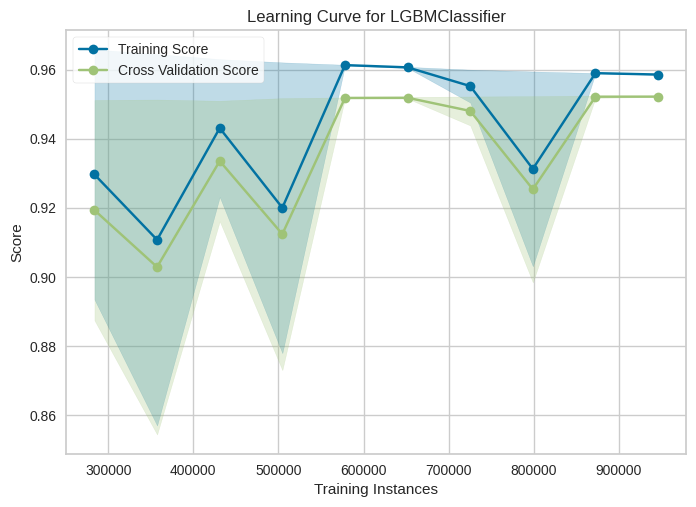

In [16]:
plot_model(best, plot = 'learning')

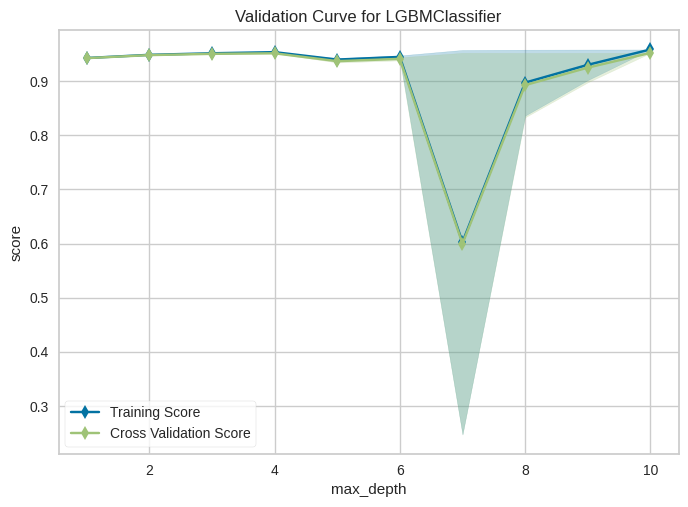

In [19]:
plot_model(best, plot = 'vc')

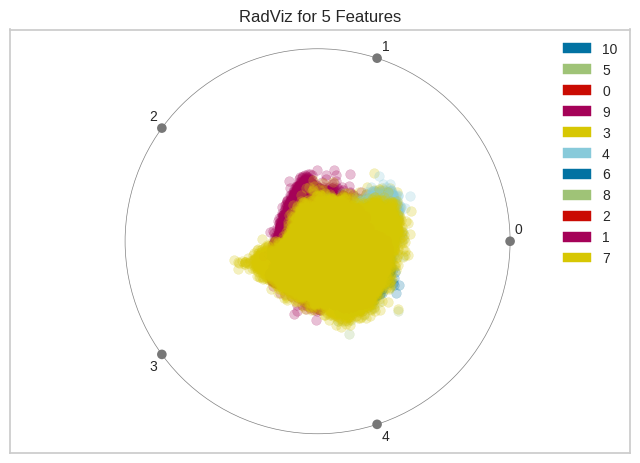

In [20]:
plot_model(best, plot = 'dimension')

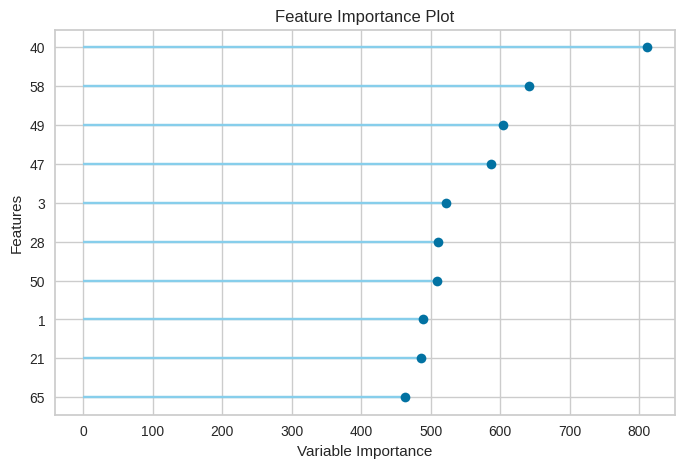

In [21]:
plot_model(best, plot = 'feature')

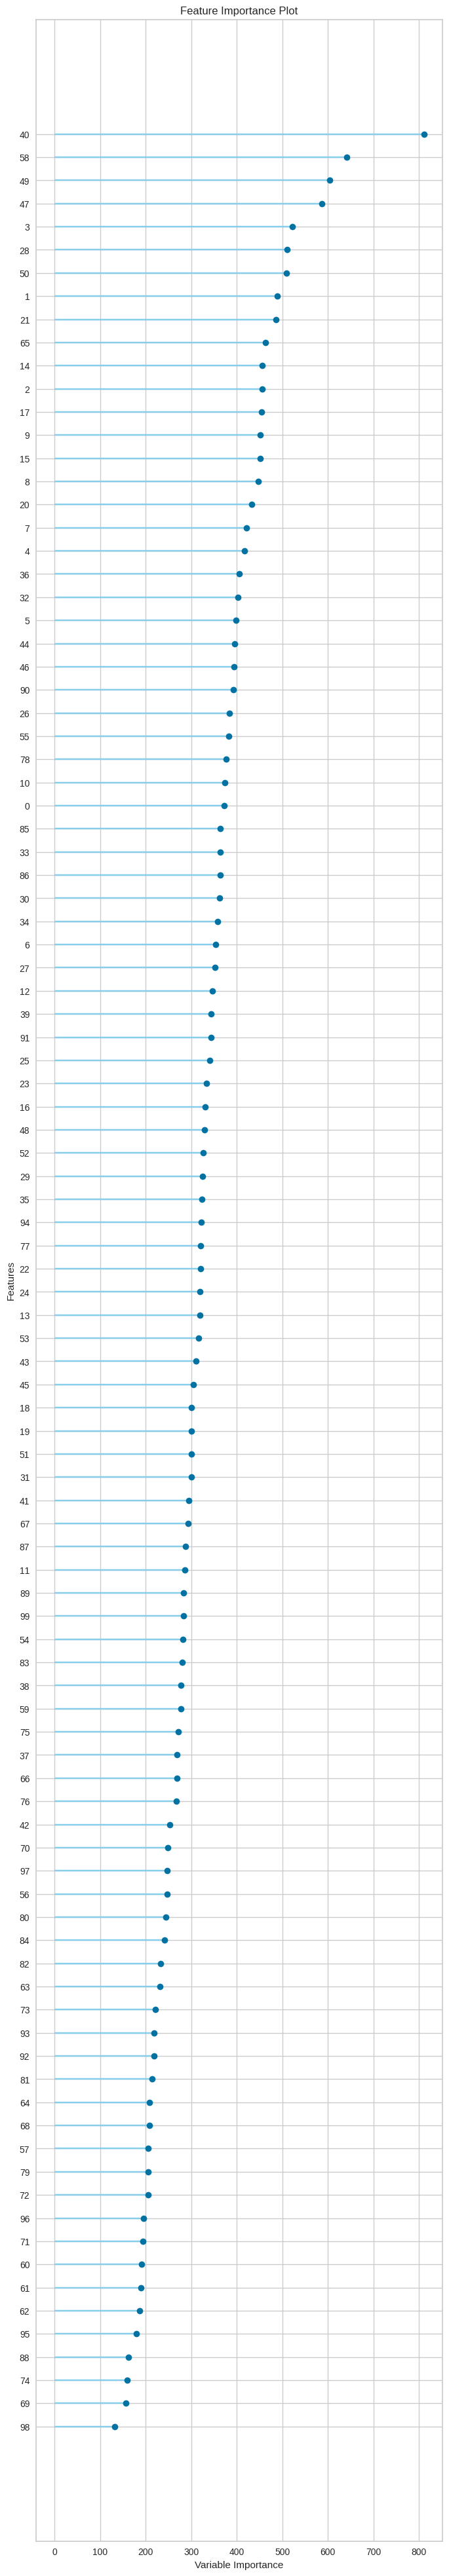

In [22]:
plot_model(best, plot = 'feature_all')

In [23]:
plot_model(best, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [31]:
# test model on holdout train set
holdout_train = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9497,0.9885,0,0,0,0.9273,0.9280


In [32]:
# predict on val set
val = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_14-41-37_train.csv' , header=0)
#train = train.drop(index=train.index[25:])
# identify the unique values in the 'ground_truth' column
unique_ids = val['ground_truth'].value_counts()[val['ground_truth'].value_counts() == 1].index
print(val.head())
val_pred = predict_model(best, data = val)

          0         1         2         3         4         5         6  \
0  0.000036 -0.005839  0.000036 -0.000036 -0.005839  0.000036 -0.000036   
1 -0.002563  0.004352 -0.000925 -0.002781 -0.003307 -0.006591  0.007723   
2  0.000291  0.000291 -0.003586  0.000291  0.003586 -0.003586  0.000291   
3 -0.001707  0.000702 -0.001692 -0.002502  0.000112 -0.004317 -0.000159   
4  0.002947 -0.002712 -0.003596  0.001877  0.003449  0.003197 -0.002988   

          7         8         9  ...        91        92        93        94  \
0 -0.000036 -0.000036 -0.000036  ...  0.020859 -0.021720 -0.002635 -0.021803   
1  0.000900  0.002940 -0.001755  ... -0.026561 -0.026467  0.011546  0.007113   
2 -0.000291  0.003586  0.000291  ...  0.002584 -0.002584 -0.002843 -0.002584   
3 -0.000713  0.004310  0.002457  ...  0.024196 -0.025993 -0.007683 -0.023339   
4  0.004427  0.003860  0.002470  ... -0.037756 -0.021971  0.015067 -0.036230   

         95        96        97        98        99  \
0 -0.023519  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9518,0.9896,0,0,0,0.9303,0.9311


In [33]:
# show predictions df
val_pred_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,ground_truth,prediction_label,prediction_score
0,0.000036,-0.005839,0.000036,-0.000036,-0.005839,0.000036,-0.000036,-0.000036,-0.000036,-0.000036,...,-0.002635,-0.021803,-0.023519,0.019338,0.002390,-0.025528,-0.003180,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#001,0.8879
1,-0.002563,0.004352,-0.000925,-0.002781,-0.003307,-0.006591,0.007723,0.000900,0.002940,-0.001755,...,0.011546,0.007113,0.029829,0.014343,-0.002327,0.024326,-0.010424,http://semanticscience.org/resource/SIO_001279,http://semanticscience.org/resource/SIO_001279,0.6073
2,0.000291,0.000291,-0.003586,0.000291,0.003586,-0.003586,0.000291,-0.000291,0.003586,0.000291,...,-0.002843,-0.002584,-0.002584,0.002584,0.002843,-0.002584,-0.002843,no_link_known,no_link_known,1.0000
3,-0.001707,0.000702,-0.001692,-0.002502,0.000112,-0.004317,-0.000159,-0.000713,0.004310,0.002457,...,-0.007683,-0.023339,-0.023716,0.022958,0.009925,-0.030913,-0.006875,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#001,0.8761
4,0.002947,-0.002712,-0.003596,0.001877,0.003449,0.003197,-0.002988,0.004427,0.003860,0.002470,...,0.015067,-0.036230,0.034744,0.031243,0.053082,0.042770,0.049509,http://semanticscience.org/resource/SIO_001279,http://semanticscience.org/resource/SIO_001279,0.6242


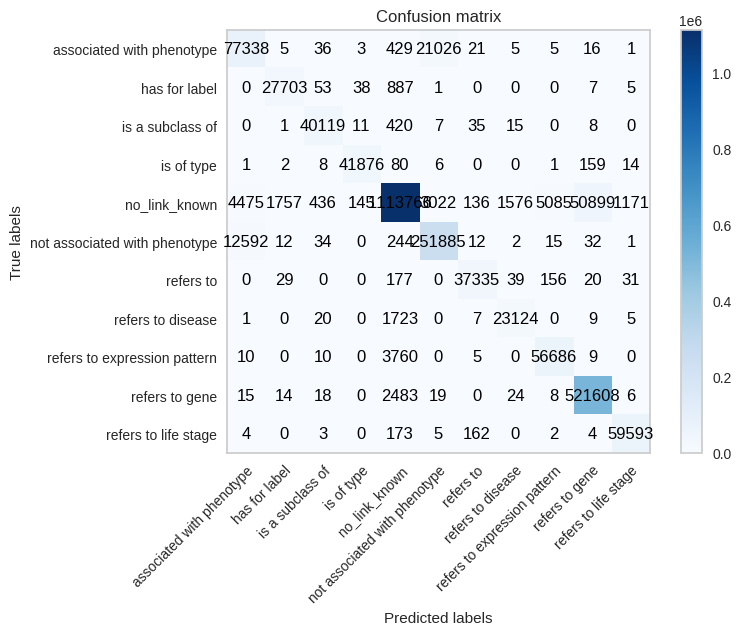

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

rel2text = {'http://semanticscience.org/resource/SIO_000281': 'not associated with phenotype',
             'http://semanticscience.org/resource/SIO_000628': 'refers to',
               'http://semanticscience.org/resource/SIO_001279': 'associated with phenotype',
                 'http://www.semanticweb.org/needed-terms#001': 'refers to gene',
                   'http://www.semanticweb.org/needed-terms#002': 'refers to life stage',
                     'http://www.semanticweb.org/needed-terms#004': 'refers to expression pattern',
                       'http://www.semanticweb.org/needed-terms#009': 'refers to disease',
                         'http://www.w3.org/1999/02/22-rdf-syntax-ns#label': 'has for label',
                           'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': 'is of type',
                             'http://www.w3.org/2000/01/rdf-schema#subClassOf': 'is a subclass of'}
def replace_labels(df, rel2text):
    df['ground_truth'] = df['ground_truth'].replace(rel2text)
    df['prediction_label'] = df['prediction_label'].replace(rel2text)
    return df

# Apply the function to the dataframe
holdout_pred = replace_labels(holdout_pred, rel2text)
# get the ground truth and predicted labels as numpy arrays
y_true = holdout_pred["ground_truth"].values
y_pred = holdout_pred["prediction_label"].values

# create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap="Blues")

# set the axis labels
ax.set_xticks(np.arange(len(np.unique(y_true))))
ax.set_yticks(np.arange(len(np.unique(y_true))))
ax.set_xticklabels(np.unique(y_true))
ax.set_yticklabels(np.unique(y_true))
#ax.grid(False)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
#plt.tick_params(axis=u'both', which=u'both',length=0)
#plt.grid(b=None)

# add the numbers inside the cells
for i in range(len(np.unique(y_true))):
    for j in range(len(np.unique(y_true))):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

# set the colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the title and show the plot
ax.set_title("Confusion matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


In [45]:
# save pipeline
save_model(best, 'lgbm_torusE')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline